# Project 2021

#### MSc in Data Analytics 2021 
#### National College of Ireland 
#### Dublin, Ireland 
#### Module: Database and Analytics Programming (H9DAP)
#### Lecturer: Athanasios Staikopoulos

Load Libraries

In [1]:
#Allows to reload custom module modifications
%load_ext autoreload
%autoreload 2

In [2]:
#Import libraries
import pandas as pd
#Imports custom functions from 'mypackage'
from  mypackage import functions  # Custom  misc functions
from  mypackage import mongo      # Custom functions for MongoDB
from  mypackage import postgresql # Custom functions for PostgreSQL

/Users/raulsainz/opt/anaconda3/lib/python3.7/site-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


### Get DataSet #1


In [7]:
mex_mort = postgresql.getTableToDataframe('mex_mort')

[04/26/2021-17:20:41]: Connecting to PostgeSQL ...
[04/26/2021-17:20:41]: Queryng table mex_mort ...
[04/26/2021-17:20:42]: OK: Sucesfully importred mex_mort into dataframe columns: 30 - rows: 10469
[04/26/2021-17:20:42]: Closing DB connection...


In [8]:
us_mort = postgresql.getTableToDataframe('us_mort')

[04/26/2021-17:20:42]: Connecting to PostgeSQL ...
[04/26/2021-17:20:42]: Queryng table us_mort ...
[04/26/2021-17:20:43]: OK: Sucesfully importred us_mort into dataframe columns: 13 - rows: 5781
[04/26/2021-17:20:43]: Closing DB connection...


In [9]:
world_mort = postgresql.getTableToDataframe('world_mort')

[04/26/2021-17:20:43]: Connecting to PostgeSQL ...
[04/26/2021-17:20:43]: Queryng table world_mort ...
[04/26/2021-17:20:43]: OK: Sucesfully importred world_mort into dataframe columns: 16 - rows: 5514
[04/26/2021-17:20:43]: Closing DB connection...


In [10]:
us_mort.head()


,index,icd10_code,marital,month,place_death,day_of_death,resident_status,race,age_group,sex,type_death,icd10_chapter,icd10_block
0,4,K760,single,May,public hospital,thursday,US_residents,White,45-54 years,female,None,K00–K93,11
1,32,K703,married,Oct,public hospital,monday,US_residents,White,55-64 years,male,None,K00–K93,11
2,39,K922,divorced,Mar,public hospital,thursday,US_residents,American_Indian,75-84 years,male,None,K00–K93,11
3,43,K746,married,Apr,public hospital,tuesday,intrastate_nonresidents,White,75-84 years,male,natural,K00–K93,11
4,52,K729,married,Aug,public hospital,saturday,US_residents,White,75-84 years,female,natural,K00–K93,11


In [174]:
world_mort.head()

,index,country_code,Year,icd10_code,autopsy,split,split_sex,forecast,month,marital,sex,day_of_death,race,age_group,icd10_chapter,icd10_block
0,277,AUT,2019,A419,N,0,0,1,May,married,male,friday,White,55-64 years,A00–B99,1
1,300,AUT,2019,A419,N,0,0,1,Aug,widowed,female,friday,White,85 years and over,A00–B99,1
2,313,AUT,2019,A419,N,0,0,1,May,married,male,friday,White,75-84 years,A00–B99,1
3,403,BEL,2019,A410,N,0,0,1,Oct,married,male,friday,White,45-54 years,A00–B99,1
4,501,BGR,2019,A403,N,0,0,1,Jul,married,male,monday,Korean,85 years and over,A00–B99,1


In [51]:
us

I00–I99    1897
D50–D89    1338
J00–J99     568
H00–H59     537
F00–F99     311
K00–K93     273
G00–G99     255
N00–N99     163
V01–Y98      96
A00–B99      88
E00–E90      73
R00–R99      68
M00–M99      42
C00–D48      29
P00–P96      16
Q00–Q99      15
L00–L99       8
O00–O99       4
Name: icd10_chapter, dtype: int64

In [12]:
# Import Plotting libraries
import matplotlib.pyplot  as plt
import matplotlib.style as style 
import seaborn as sns

In [13]:
#sns.set_theme('bmh')
#plt.style.use('plot-style-name-goes-here')
sns.set()
sns.set_context('poster',rc={"grid.linewidth": 5})
sns.set_style("whitegrid")
#sns.set_context("notebook")
colors = ["#5998B1","#406F82","#264653","#287271","#2a9d8f","#8AB17D","#E9C46A","#EFB366","#F4A261","#E76F51","#C53D1B","#923B26"]
#colors = ["#345E6F","#264653","#287271","#2a9d8f","#e9c46a","#efb366","#f4a261","#ee8959","#e76f51","#e87153","#e97c61", '#902C14']
f_folors = ["#E76F51","#F4A261","#E9C46A","#2A9D8F","#264653"]

bin_colors = ["#264653","#2A9D8F"]
sns.set_palette(sns.color_palette(colors))
mul_palette = sns.color_palette(colors)
bin_palette = sns.color_palette(bin_colors)
f_palette = sns.color_palette(f_folors)
sns.set(rc={'figure.figsize':(10,5)}, font_scale=1.5)
sns.set_style({'axes.facecolor':'white', 'grid.color': '.8','grid.linestyle': '--'})

<AxesSubplot:>

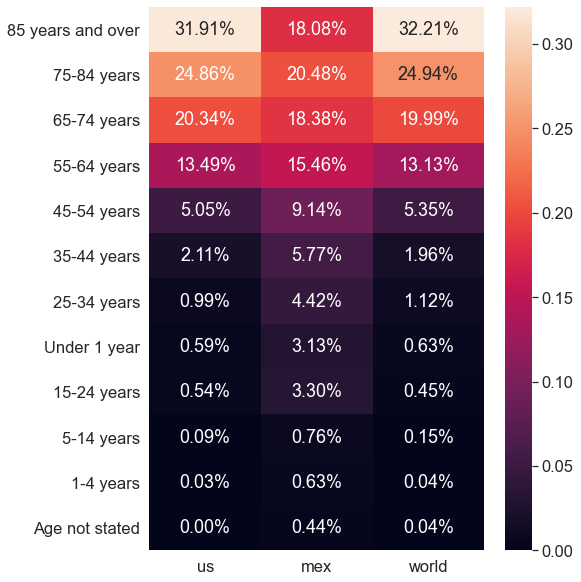

In [27]:
column = 'age_group'
mex  = mex_mort[column].value_counts(normalize=True)
us  = us_mort[column].value_counts(normalize=True)
world = world_mort[column].value_counts(normalize=True)
# create a dictonary
data = {"us": us,
        "mex": mex,
        "world": world}
df_total_age = pd.concat(data,
               axis = 1)
df_total_age = df_total_age.fillna(0)
plt.figure(figsize=(7.5,10))
sns.heatmap(df_total_age,annot=True,fmt ='.2%' )

In [17]:
df_total

,us,mex,world
male,0.514617,0.566243,0.519768
female,0.485383,0.433375,0.480232
unknown,NaN,0.000382,NaN


<AxesSubplot:>

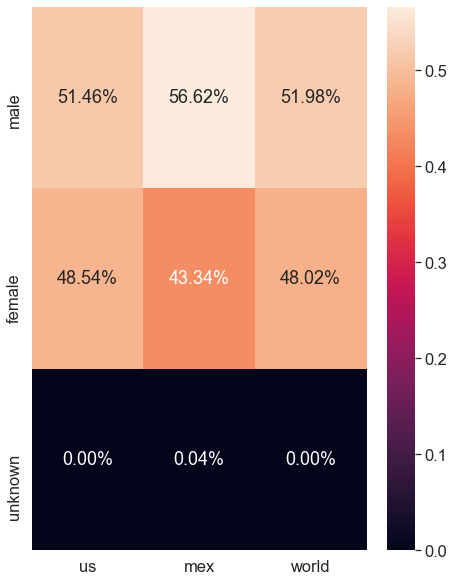

In [34]:
column = 'sex'
mex  = mex_mort[column].value_counts(normalize=True)
us  = us_mort[column].value_counts(normalize=True)
world = world_mort[column].value_counts(normalize=True)
# create a dictonary
data = {"us": us,
        "mex": mex,
        "world": world}
df_total_sex = pd.concat(data,
               axis = 1)
df_total_sex = df_total_sex.fillna(0)
plt.figure(figsize=(7.5,10))
sns.heatmap(df_total_sex,annot=True,fmt ='.2%' )

In [24]:
 list(df_total.sum(axis=0).sort_values(ascending=False).index)

['us', 'mex', 'world']

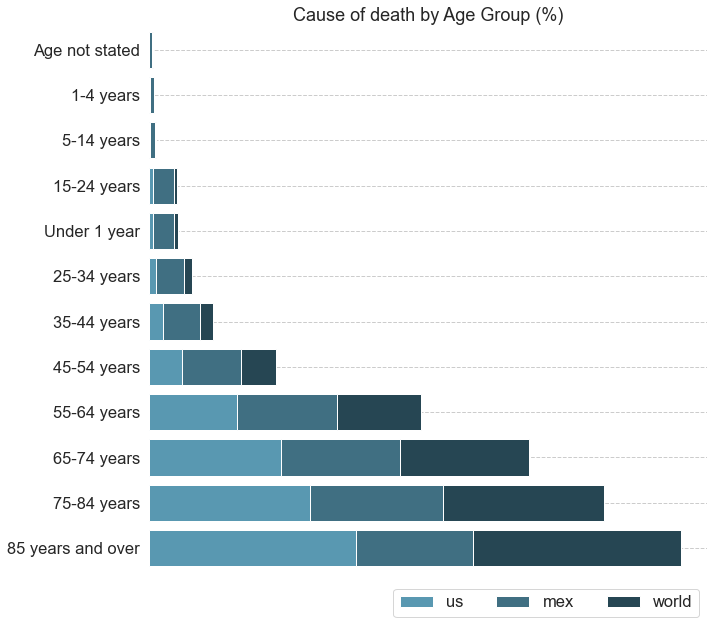

In [32]:
custom_colors = ["#5998B1","#406F82","#264653","#287271","#2a9d8f","#8AB17D","#E9C46A","#EFB366","#F4A261","#E76F51","#C53D1B","#923B26"]
#custom_colors.reverse()


fields =  list(df_total_age.sum(axis=0).sort_values(ascending=False).index)
labels = fields

fig, ax = plt.subplots(1, figsize=(10, 10))
# plot bars
left = len(df_total_age) * [0]
for idx, name in enumerate(fields):
    rects = plt.barh(df_total_age.index, df_total_age[name], left = left,color=custom_colors[idx])
    left = left + df_total_age[name]
    text_color = 'darkgrey'
# title, legend, labels
plt.title('Cause of death by Age Group (%)', loc='center')
#plt.legend(labels,ncol=len(labels), bbox_to_anchor = (0, 1), frameon=True,loc='lower left', fontsize='small')
#plt.legend(labels,ncol=len(labels), bbox_to_anchor = (0, 1), frameon=True,loc='lower left', fontsize='small')
plt.legend(labels,ncol=3, loc="lower right", frameon=True,bbox_to_anchor = (1, -0.1))
#plt.legend(labels, bbox_to_anchor = (1, 1))
# remove spines
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)# adjust limits and draw grid lines
ax.axes.xaxis.set_visible(False)
plt.ylim(-0.5, ax.get_yticks()[-1] + 0.5)
ax.set_axisbelow(True)
plt.show()

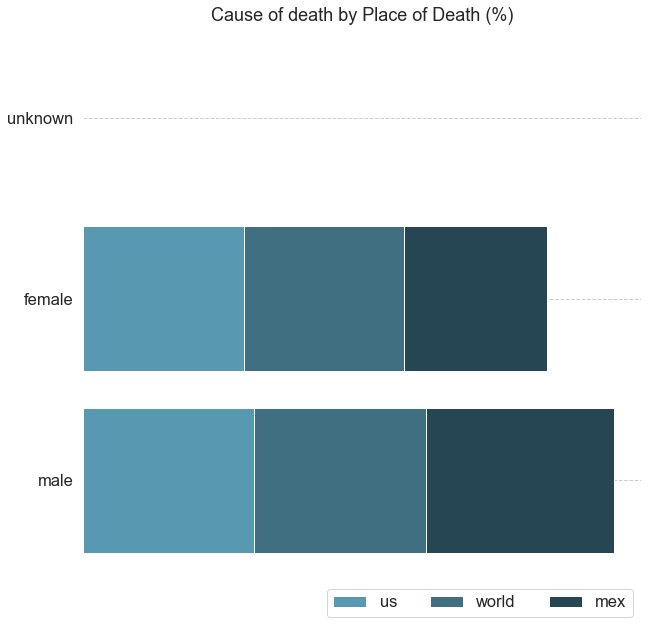

In [35]:
custom_colors = ["#5998B1","#406F82","#264653","#287271","#2a9d8f","#8AB17D","#E9C46A","#EFB366","#F4A261","#E76F51","#C53D1B","#923B26"]
#custom_colors.reverse()


fields =  list(df_total_sex.sum(axis=0).sort_values(ascending=False).index)
labels = fields

fig, ax = plt.subplots(1, figsize=(10, 10))
# plot bars
left = len(df_total_sex) * [0]
for idx, name in enumerate(fields):
    rects = plt.barh(df_total_sex.index, df_total_sex[name], left = left, color=custom_colors[idx])
    left = left + df_total_sex[name]
    text_color = 'darkgrey'
# title, legend, labels
plt.title('Cause of death by Place of Death (%)', loc='center')
#plt.legend(labels,ncol=len(labels), bbox_to_anchor = (0, 1), frameon=True,loc='lower left', fontsize='small')
#plt.legend(labels,ncol=len(labels), bbox_to_anchor = (0, 1), frameon=True,loc='lower left', fontsize='small')
plt.legend(labels,ncol=3, loc="lower right", frameon=True,bbox_to_anchor = (1, -0.1))
#plt.legend(labels, bbox_to_anchor = (1, 1))
# remove spines
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)# adjust limits and draw grid lines
ax.axes.xaxis.set_visible(False)
plt.ylim(-0.5, ax.get_yticks()[-1] + 0.5)
ax.set_axisbelow(True)
plt.show()